# Principal component analysis (PCA)

In [33]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = load_breast_cancer()
X = raw_data.data
y = raw_data.target

df = pd.DataFrame(X, columns=raw_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA

X_train shape (381, 30)
PCA transformation (381, 30)


[Text(0.5, 1.0, 'Proportion variance explained elbow plot')]

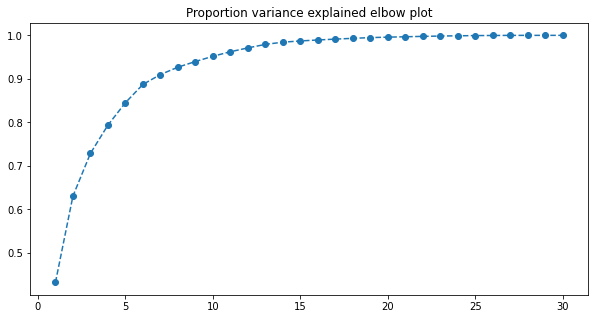

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("X_train shape", X_train.shape)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

pca = PCA(n_components=X_train.shape[1])
pca_transformation = pca.fit_transform(scaled_X_train)
print("PCA transformation", pca_transformation.shape)

proportion_variance_explained = pca.explained_variance_ratio_
pve_cum_sum = np.cumsum(proportion_variance_explained)

fig, ax = plt.figure(figsize=(10,5)), plt.axes()
plt.plot(range(1, len(pve_cum_sum)+1), pve_cum_sum, "o--")
ax.set(title = "Proportion variance explained elbow plot")

## Visualization

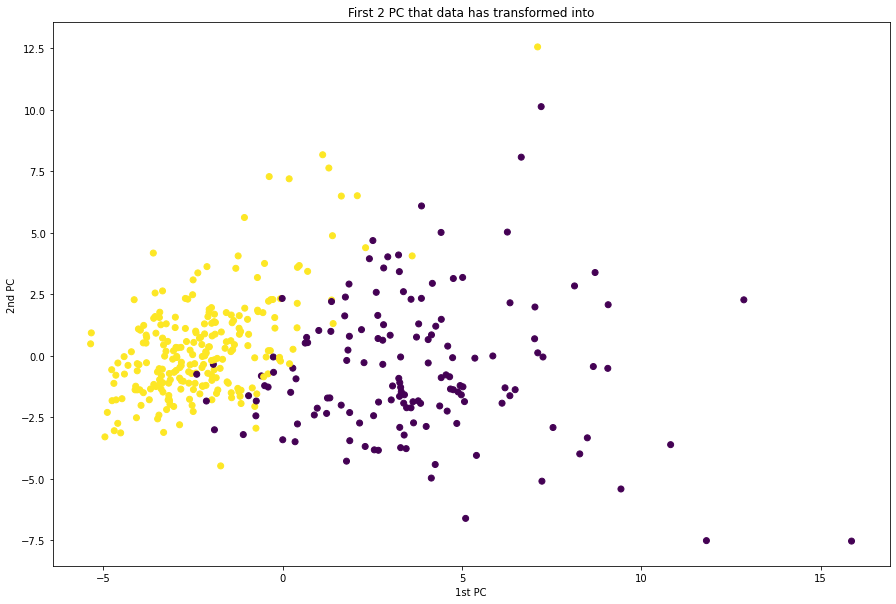

In [35]:
fig, ax = plt.figure(figsize=(15,10)), plt.axes()
ax.scatter(pca_transformation[:,0], pca_transformation[:,1], c = y_train)
ax.set(title= "First 2 PC that data has transformed into", xlabel= "1st PC", ylabel="2nd PC")
plt.show()

## PCA in a pipeline

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(title)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



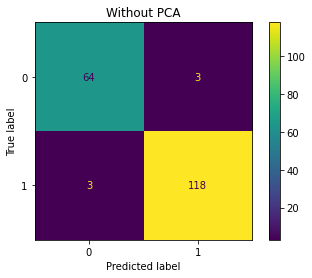

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

pipe_with_pca = Pipeline([
    ("sacaling", StandardScaler()),
    ("dimension_reduction", PCA(10)),
    ("svm", LinearSVC(max_iter=10000))
])

pipe_without_pca = Pipeline([
    ("sacaling", StandardScaler()),
    ("svm", LinearSVC(max_iter=10000))
])

evaluate_model(pipe_without_pca, "Without PCA")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



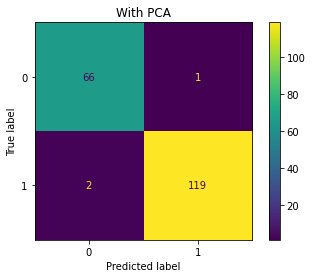

In [38]:
evaluate_model(pipe_with_pca, "With PCA")